In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [46]:
data=pd.read_csv("../datasets/titanic/train.csv")
data.shape

(891, 12)

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

* This is a binary classification problem
* 7-categorical columns :Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
* 5-numerical columns : PassengerId,Age,SibSp,Parch,Fare
* PassengerId,Name,Ticket do not contribute much in predicting model that the person will gonna survive or not.
* Age and Cabin(more that half) column have missing values
* Fare column has minimum fare equal to zero
* Age column has minimum age equal to 0.4 means new born babies are also at ship

In [52]:
categorical_columns=data.select_dtypes(include='object')
categorical_columns['Pclass']=data['Pclass']
categorical_columns['Survived']=data['Survived']

for col in categorical_columns:
    print(f"{col} : {data[col].value_counts().count()}")

Name : 891
Sex : 2
Ticket : 681
Cabin : 147
Embarked : 3
Pclass : 3
Survived : 2


<Axes: xlabel='Pclass', ylabel='count'>

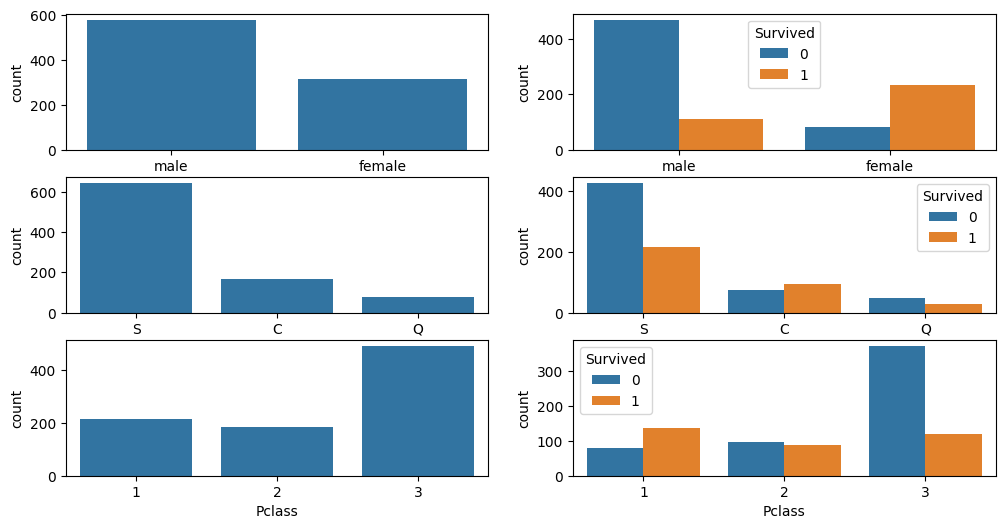

In [53]:
fig,axis=plt.subplots(3,2,figsize=(12,6))
sns.countplot(x='Sex',data=data,ax=axis[0,0])
sns.countplot(x='Sex',hue='Survived',data=data,ax=axis[0,1])

sns.countplot(x='Embarked',data=data,ax=axis[1,0])
sns.countplot(x='Embarked',hue='Survived',data=data,ax=axis[1,1])

sns.countplot(x='Pclass',data=data,ax=axis[2,0])
sns.countplot(x='Pclass',hue='Survived',data=data,ax=axis[2,1])

* Survival chance of females are high

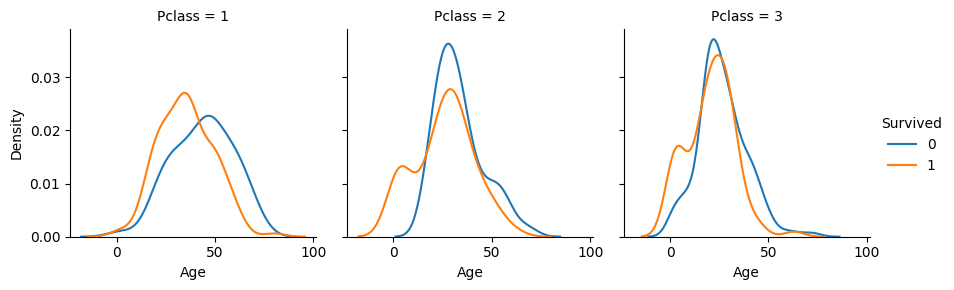

In [54]:
g=sns.FacetGrid(data=data,hue='Survived',col='Pclass')
g.map(sns.kdeplot,'Age')
g.add_legend()


* Survival chance of children are higher in each class
* In Pclass 2 people of age ~25 has higher chance of death
* In Pclass 1 people of age ~25 has higher chance of survival 

* Pclass 1 has higher chance of survival among all classes
* Pclass 3 has lower chance of survival among all classes

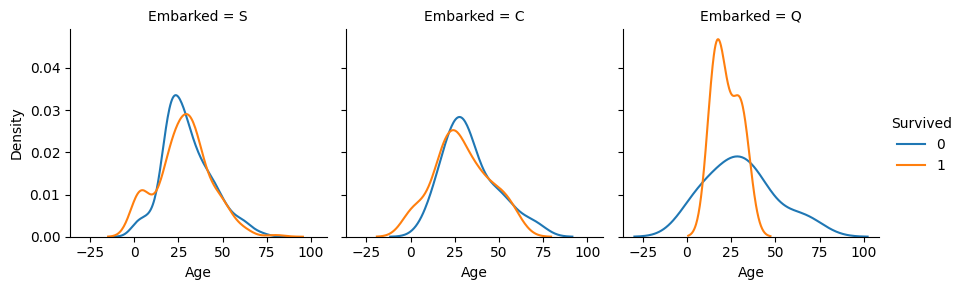

In [55]:
g=sns.FacetGrid(data=data,hue='Survived',col='Embarked')
g.map(sns.kdeplot,'Age')
g.add_legend()

* This shows that there is higher survival chance of age ~25 for Embarked Q

In [56]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Axes: xlabel='Age', ylabel='Density'>

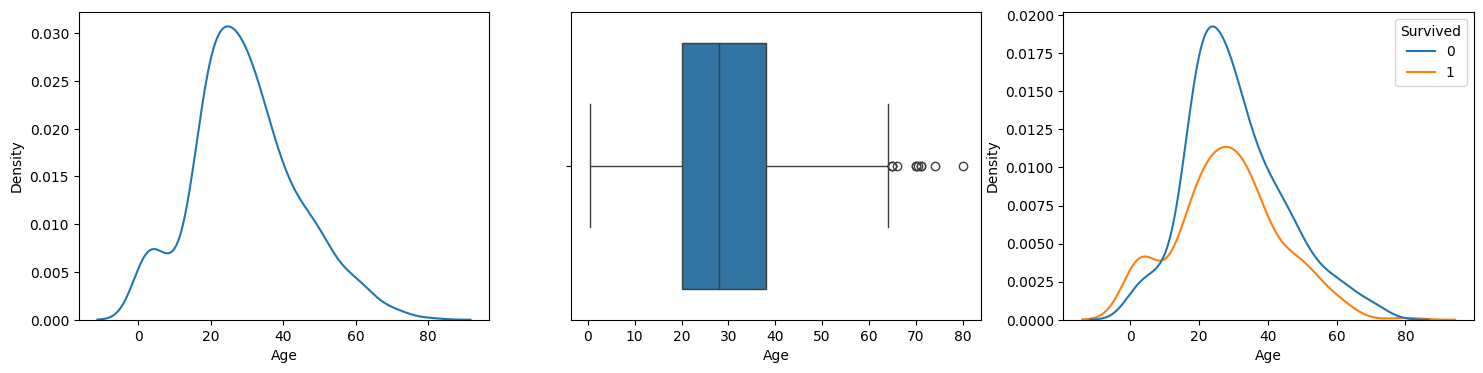

In [57]:
#Age column
fig,axis=plt.subplots(1,3,figsize=(18,4))

sns.kdeplot(x='Age',data=data,ax=axis[0])
sns.boxplot(x='Age',data=data,ax=axis[1])
sns.kdeplot(x='Age',hue='Survived', data=data.dropna(subset=['Age']),ax=axis[2])


In [58]:
data[data['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


* Age is almost normally distributed 
* It looks like there is some outliers but there's not
* Passengers have age less than 10 (children) have more survival chance 

<Axes: xlabel='Fare', ylabel='Density'>

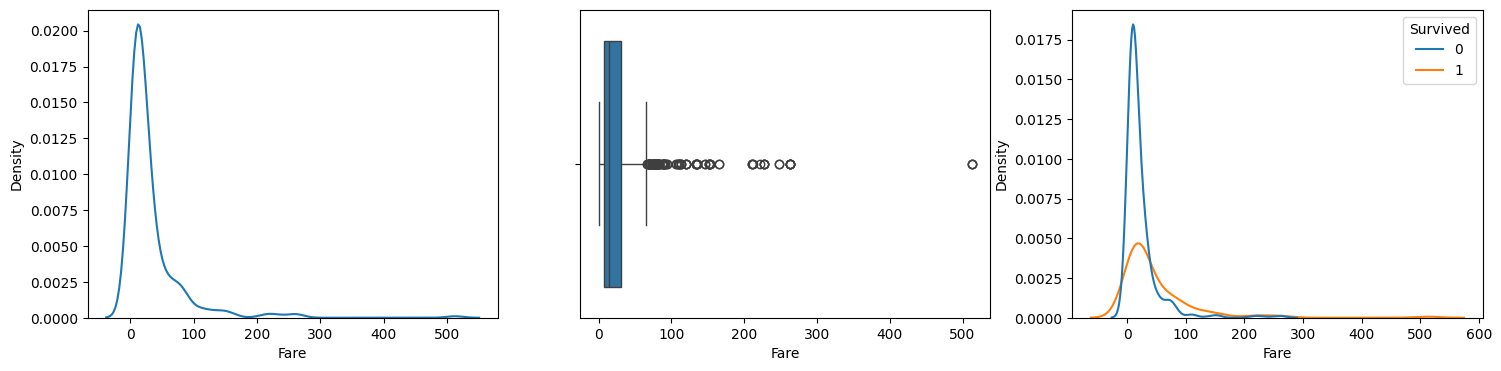

In [59]:
#Fare column 
fig,axis=plt.subplots(1,3,figsize=(18,4))

sns.kdeplot(x='Fare',data=data,ax=axis[0])
sns.boxplot(x='Fare',data=data,ax=axis[1])
sns.kdeplot(x='Fare',hue='Survived',data=data,ax=axis[2])

In [60]:
data[(data['Fare']>=100) &(data['Fare']<=200)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.00,1,0,PC 17758,108.9000,C65,C
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.00,0,2,36928,164.8667,C7,S


In [61]:
data[data['Fare']>200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [62]:
data[data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


* Fare column has total fare of a family
* Those people are traveling for free are crew members as their embarked location is same
* Fare column also not contribute in predicting the survival of a person 

In [63]:
#SibSp refer to number of Siblings and Spouses(husband or wife) with person
#Parch refer to number of Parent and Child with person

data['Family']=data['SibSp']+data['Parch']+1
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [64]:
#droping unnecessary columns
data.drop(columns=['PassengerId','Name','Ticket','SibSp','Parch','Fare'],inplace=True,axis=1)
data.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked,Family
0,0,3,male,22.0,NaN,S,2
1,1,1,female,38.0,C85,C,2
2,1,3,female,26.0,NaN,S,1
3,1,1,female,35.0,C123,S,2
4,0,3,male,35.0,NaN,S,1


In [65]:
#apply train_test_split

X=data.drop(columns=['Survived'])
y=data['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_test.head()

,Pclass,Sex,Age,Cabin,Embarked,Family
709,3,male,NaN,NaN,C,3
439,2,male,31.0,NaN,S,1
840,3,male,20.0,NaN,S,1
720,2,female,6.0,NaN,S,2
39,3,female,14.0,NaN,C,2


In [66]:
#handle missing value
from sklearn.impute import SimpleImputer

age_imputer=SimpleImputer(strategy='median')
X_train['Age']=age_imputer.fit_transform(X_train[['Age']]).ravel()
X_test['Age']=age_imputer.transform(X_test[['Age']]).ravel()

cabin_imputer=SimpleImputer(strategy='constant', fill_value='On Deck')
X_train['Cabin']=cabin_imputer.fit_transform(X_train[['Cabin']]).ravel()
X_test['Cabin']=cabin_imputer.transform(X_test[['Cabin']]).ravel()

embarked_imputer=SimpleImputer(strategy='most_frequent')
X_train['Embarked']=embarked_imputer.fit_transform(X_train[['Embarked']]).ravel()
X_test['Embarked']=embarked_imputer.transform(X_test[['Embarked']]).ravel()


X_train.head()

,Pclass,Sex,Age,Cabin,Embarked,Family
445,1,male,4.0,A34,S,3
650,3,male,28.0,On Deck,S,1
172,3,female,1.0,On Deck,S,3
450,2,male,36.0,On Deck,S,4
314,2,male,43.0,On Deck,S,3


In [67]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 445 to 102
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Sex       623 non-null    object 
 2   Age       623 non-null    float64
 3   Cabin     623 non-null    object 
 4   Embarked  623 non-null    object 
 5   Family    623 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 34.1+ KB


In [68]:
#encoding the categorical values
from sklearn.preprocessing import OrdinalEncoder
encoder={}
cat_columns=X_train.select_dtypes(include='object')
for col in cat_columns:
    encoder[col]=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X_train[col]=encoder[col].fit_transform(X_train[[col]]).ravel()
    X_test[col]=encoder[col].transform(X_test[[col]]).ravel()


In [69]:
#scalling of data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

X_train=pd.DataFrame(scaled_X_train,columns=X_train.columns)
X_test=pd.DataFrame(scaled_X_test,columns=X_test.columns)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    float64
 1   Sex       623 non-null    float64
 2   Age       623 non-null    float64
 3   Cabin     623 non-null    float64
 4   Embarked  623 non-null    float64
 5   Family    623 non-null    float64
dtypes: float64(6)
memory usage: 29.3 KB


In [70]:
#model training
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred=pd.DataFrame(y_pred,columns=['Survived'])
y_pred



,Survived
0,0
1,0
2,0
3,1
4,1
...,...
263,0
264,0
265,0
266,0


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

